# LSTM

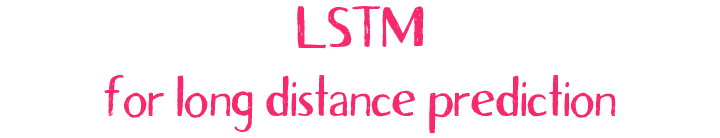

LSTM for predicting long distance dependencies.

We first try Linear Model, RNN, LSTM and then GRU for short distance dependencies.

We then try LSTM for long distance dependencies.

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# :::::: Short distance data ::::::


## -|- Section 01 Importing/ Generating Data -|-

### Generating original data
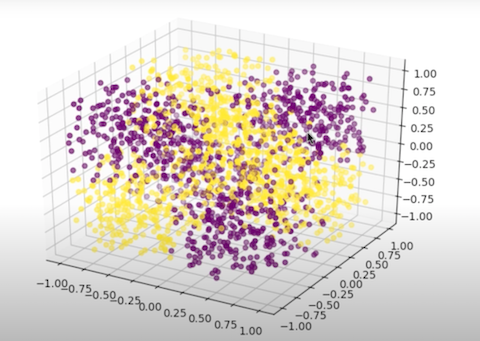

In [2]:
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## -|- Section 02 Linear Model -|-

### Training linear model

In [3]:
# note: it is linear model for classification!
input = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(input)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
history = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 4s 8ms/step - loss: 0.8138 - accuracy: 0.5031 - val_loss: 0.6970 - val_accuracy: 0.5064
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4639 - val_loss: 0.6938 - val_accuracy: 0.5132
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5090 - val_loss: 0.6933 - val_accuracy: 0.5188
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4973 - val_loss: 0.6943 - val_accuracy: 0.5104
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5162 - val_loss: 0.6939 - val_accuracy: 0.5148
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4848 - val_loss: 0.6934 - val_accuracy: 0.5232
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5173 - val_loss: 0.6945 - val_accuracy: 0.5036
Epoch 8/100
7

### Plotting loss per iteration

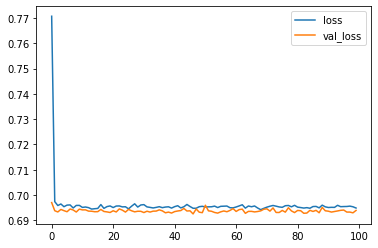

In [4]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

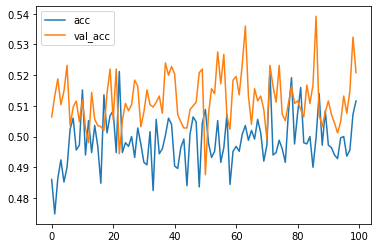

In [5]:
# should be around 50%
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

The linear model performs badly.

## -|- Section 03 Simple RNN Model -|-

### Training simple RNN model

In [6]:
inputs = np.expand_dims(X, -1)

# make the RNN
input = Input(shape=(T, D))

x = SimpleRNN(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.6994 - accuracy: 0.5498 - val_loss: 0.6762 - val_accuracy: 0.6032
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6657 - accuracy: 0.6137 - val_loss: 0.6281 - val_accuracy: 0.7184
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5972 - accuracy: 0.7625 - val_loss: 0.5216 - val_accuracy: 0.8168
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.4759 - accuracy: 0.8526 - val_loss: 0.4102 - val_accuracy: 0.8620
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3734 - accuracy: 0.8930 - val_loss: 0.3417 - val_accuracy: 0.8916
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3192 - accuracy: 0.9054 - val_loss: 0.2866 - val_accuracy: 0.9128
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.2681 - accuracy: 0.9212 - val_loss: 0.2531 - val_accuracy: 0.9168
Epoch 

### Plotting loss per iteration

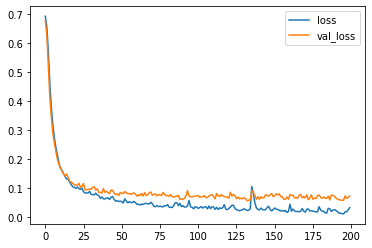

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

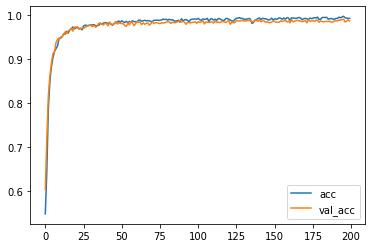

In [8]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

As you can see accuracy is pretty high. So we can say that simple RNN can solve given short distance problem.

## -|- Section 04 LSTM Model -|-

### Training LSTM model

In [9]:
inputs = np.expand_dims(X, -1)

# make the LSTM
input = Input(shape=(T, D))

x = LSTM(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the LSTM
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 31s 10ms/step - loss: 0.6929 - accuracy: 0.5172 - val_loss: 0.6923 - val_accuracy: 0.5164
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5213 - val_loss: 0.6891 - val_accuracy: 0.5336
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.5769 - val_loss: 0.6476 - val_accuracy: 0.6140
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6194 - accuracy: 0.6628 - val_loss: 0.5526 - val_accuracy: 0.7184
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5315 - accuracy: 0.7283 - val_loss: 0.4507 - val_accuracy: 0.8072
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8561 - val_loss: 0.2880 - val_accuracy: 0.9112
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.9302 - val_loss: 0.2054 - val_accuracy: 0.9436
Epoch 8/200

### Plotting loss per iteration

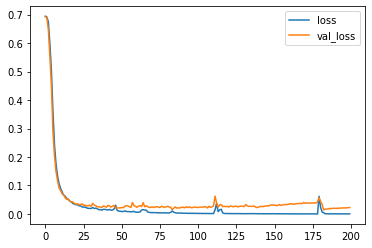

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

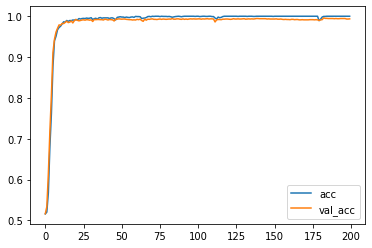

In [11]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

LSTM outperforms Simple RNN for a given short-term problem.

## -|- Section 05 GRU Model -|-

### Training GRU model

In [12]:
inputs = np.expand_dims(X, -1)

# make the GRU
input = Input(shape=(T, D))

x = GRU(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the GRU
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6934 - accuracy: 0.4889 - val_loss: 0.6744 - val_accuracy: 0.6096
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6348 - val_loss: 0.5522 - val_accuracy: 0.7396
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.7277 - val_loss: 0.4352 - val_accuracy: 0.7964
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4197 - accuracy: 0.7972 - val_loss: 0.3555 - val_accuracy: 0.8460
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.8542 - val_loss: 0.3001 - val_accuracy: 0.8828
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2898 - accuracy: 0.8928 - val_loss: 0.2505 - val_accuracy: 0.9128
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.9164 - val_loss: 0.2131 - val_accuracy: 0.9400
Epoch 8/200
7

### Plotting loss per iteration

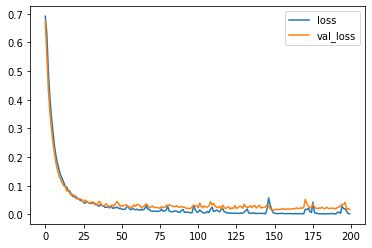

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

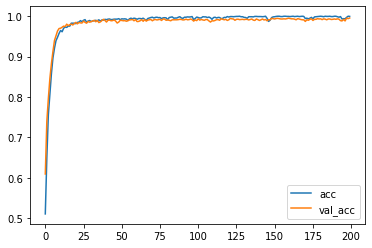

In [14]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

GRU also does well in a given short distance problem.

## -|- Section 06 LSTM with Global max pooling -|-

### Training LSTM with Global max pooling

In [15]:
inputs = np.expand_dims(X, -1)

# make the LSTM with Global max pooling
input = Input(shape=(T, D))

x = LSTM(5, return_sequences=True)(input)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the LSTM with Global max pooling
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6938 - accuracy: 0.5142 - val_loss: 0.6936 - val_accuracy: 0.4960
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5004 - val_loss: 0.6930 - val_accuracy: 0.5176
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.4972
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5099 - val_loss: 0.6929 - val_accuracy: 0.5132
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5083 - val_loss: 0.6932 - val_accuracy: 0.5016
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5143 - val_loss: 0.6929 - val_accuracy: 0.5028
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5134 - val_loss: 0.6947 - val_accuracy: 0.5016
Epoch 8/200


### Plotting loss per iteration

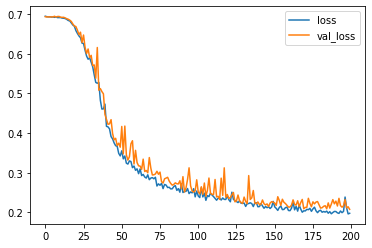

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

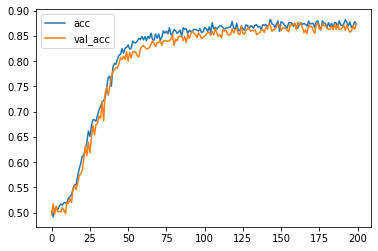

In [17]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In a given short distance problem, LSTM with Global max pooling also performs well.

# :::::: Long distance data ::::::

## -|- Section 01 Importing/ Generating Data -|-

### Generating original data

In [18]:
# Long distance problem
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## -|- Section 02 Simple RNN Model -|-

### Training simple RNN model

In [19]:
inputs = np.expand_dims(X, -1)

# make the RNN
input = Input(shape=(T, D))

x = SimpleRNN(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.7132 - accuracy: 0.4673 - val_loss: 0.6923 - val_accuracy: 0.5172
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6961 - accuracy: 0.4958 - val_loss: 0.6938 - val_accuracy: 0.5076
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.5044 - val_loss: 0.6919 - val_accuracy: 0.5196
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5264 - val_loss: 0.6727 - val_accuracy: 0.5816
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6807 - accuracy: 0.5688 - val_loss: 0.6785 - val_accuracy: 0.5752
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6693 - accuracy: 0.5830 - val_loss: 0.6710 - val_accuracy: 0.5864
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6720 - accuracy: 0.6006 - val_loss: 0.6582 - val_accuracy: 0.6064
Epoch 

### Plotting loss per iteration

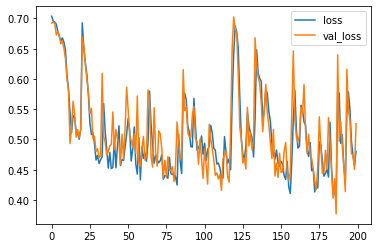

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

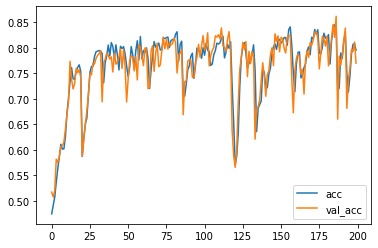

In [21]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

While accuracy improves, we can see that RNN has a hard time learning long distances.

## -|- Section 03 LSTM Model -|-

### Training LSTM model

In [22]:
inputs = np.expand_dims(X, -1)

# make the LSTM
input = Input(shape=(T, D))

x = LSTM(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the LSTM
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6946 - accuracy: 0.4961 - val_loss: 0.6945 - val_accuracy: 0.4728
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4848 - val_loss: 0.6927 - val_accuracy: 0.5192
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5079 - val_loss: 0.6944 - val_accuracy: 0.4776
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5144 - val_loss: 0.6937 - val_accuracy: 0.4860
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5146 - val_loss: 0.6962 - val_accuracy: 0.4788
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5067 - val_loss: 0.6935 - val_accuracy: 0.4856
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5126 - val_loss: 0.6951 - val_accuracy: 0.4872
Epoch 8/200


### Plotting loss per iteration

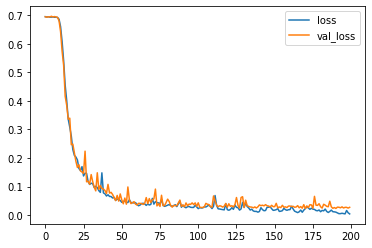

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

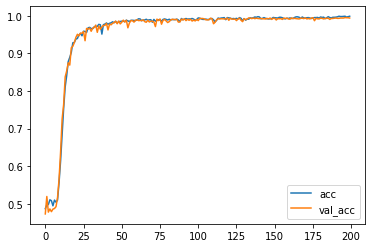

In [24]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

LSTM does well in a given long distance problem.

# :::::: More long distance data ::::::

(Making the problem harder by making T larger)

## -|- Section 01 Importing/ Generating Data -|-

### Generating original data

In [25]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## -|- Section 02 Simple RNN Model -|-

### Training simple RNN model

In [26]:
inputs = np.expand_dims(X, -1)

# make the RNN
input = Input(shape=(T, D))

x = SimpleRNN(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 18ms/step - loss: 0.7058 - accuracy: 0.4944 - val_loss: 0.6957 - val_accuracy: 0.5060
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6963 - accuracy: 0.4812 - val_loss: 0.6940 - val_accuracy: 0.5196
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6955 - accuracy: 0.5026 - val_loss: 0.6941 - val_accuracy: 0.5152
Epoch 4/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5045 - val_loss: 0.6947 - val_accuracy: 0.5040
Epoch 5/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6929 - accuracy: 0.5229 - val_loss: 0.6940 - val_accuracy: 0.5120
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6910 - accuracy: 0.5335 - val_loss: 0.6939 - val_accuracy: 0.5112
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5102 - val_loss: 0.6952 - val_accuracy: 0.5136
Epoch 

### Plotting loss per iteration

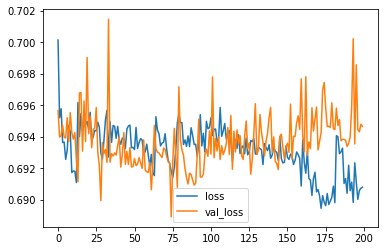

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

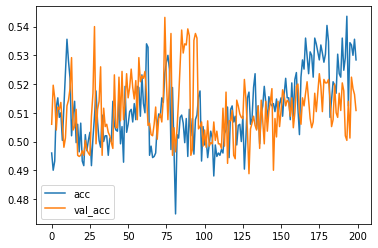

In [28]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

For the given Long distance problem, RNN performs poorly.

## -|- Section 03 LSTM Model -|-

### Training LSTM model

In [29]:
inputs = np.expand_dims(X, -1)

# make the LSTM
input = Input(shape=(T, D))

x = LSTM(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the LSTM
history = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6941 - accuracy: 0.4936 - val_loss: 0.6934 - val_accuracy: 0.4956
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.4971 - val_loss: 0.6945 - val_accuracy: 0.5012
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5119 - val_loss: 0.6927 - val_accuracy: 0.5060
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4982 - val_loss: 0.6927 - val_accuracy: 0.5104
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5122 - val_loss: 0.6928 - val_accuracy: 0.5068
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5132 - val_loss: 0.6934 - val_accuracy: 0.5036
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4968 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 8/200


### Plotting loss per iteration

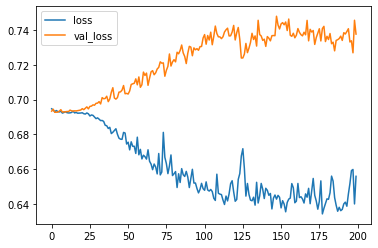

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

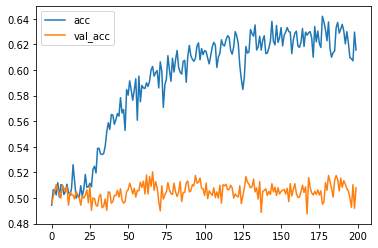

In [31]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

LSTM doesn't fare much better.

## -|- Section 04 GRU Model -|-

### Training GRU model

In [32]:
inputs = np.expand_dims(X, -1)

# make the GRU
input = Input(shape=(T, D))

x = GRU(5)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the GRU
history = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 10ms/step - loss: 0.6954 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5070 - val_loss: 0.6957 - val_accuracy: 0.4944
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4953 - val_loss: 0.6929 - val_accuracy: 0.5048
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4719 - val_loss: 0.6929 - val_accuracy: 0.5068
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5015 - val_loss: 0.6949 - val_accuracy: 0.4992
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.4877 - val_loss: 0.6927 - val_accuracy: 0.5044
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5019 - val_loss: 0.6927 - val_accuracy: 0.5192
Epoch 8/400


### Plotting loss per iteration

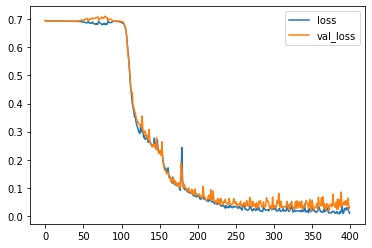

In [33]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

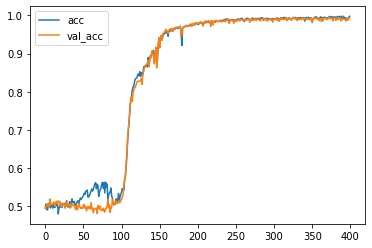

In [34]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

GRU has a much harder time learning long distances than LSTM; as you can see, it takes about 400 iterations.

# :::::: Even more long distance data ::::::

(Making the problem harder by making T larger)

## -|- Section 01 Importing/ Generating Data -|-

### Generating original data

In [35]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## -|- Section 02 LSTM Model -|-

### Training LSTM model

In [36]:
inputs = np.expand_dims(X, -1)

# make the LSTM
input = Input(shape=(T, D))

x = LSTM(15)(input)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the LSTM
history = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 11ms/step - loss: 0.6952 - accuracy: 0.5137 - val_loss: 0.6934 - val_accuracy: 0.4924
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5092 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6935 - val_accuracy: 0.5084
Epoch 4/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6938 - accuracy: 0.5076 - val_loss: 0.6936 - val_accuracy: 0.5116
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5233 - val_loss: 0.6938 - val_accuracy: 0.5024
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5240 - val_loss: 0.6947 - val_accuracy: 0.4988
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5124 - val_loss: 0.6945 - val_accuracy: 0.5048
Epoch 8/400


### Plotting loss per iteration

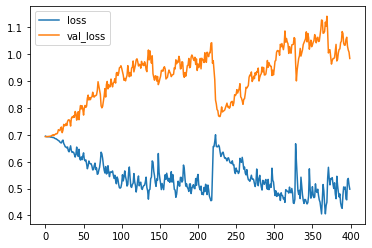

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

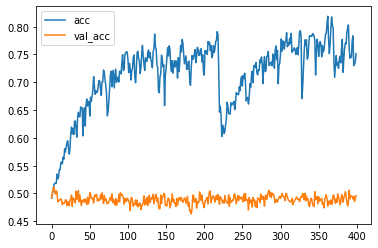

In [38]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

LSTM can learn the long distance to a point, but it fails after that.

## -|- Section 03 LSTM with Global Max Pooling -|-

### Training LSTM with Global Max Pooling

In [39]:
inputs = np.expand_dims(X, -1)

# make the LSTM with Global Max Pooling
input = Input(shape=(T, D))

x = LSTM(5, return_sequences=True)(input)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(input, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the LSTM with Global Max Pooling
history = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 11ms/step - loss: 0.6963 - accuracy: 0.5142 - val_loss: 0.6939 - val_accuracy: 0.4972
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6944 - accuracy: 0.4925 - val_loss: 0.6936 - val_accuracy: 0.4980
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.4936 - val_loss: 0.6936 - val_accuracy: 0.4944
Epoch 4/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5134 - val_loss: 0.6943 - val_accuracy: 0.4920
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5018 - val_loss: 0.6937 - val_accuracy: 0.5040
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4968 - val_loss: 0.6946 - val_accuracy: 0.5052
Epoch 7/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.4815 - val_loss: 0.6948 - val_accuracy: 0.5080
Epoch 8/100


### Plotting loss per iteration

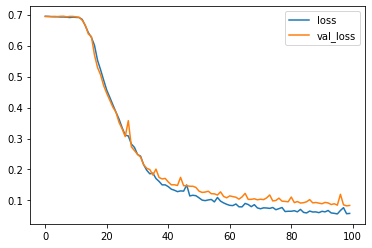

In [40]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

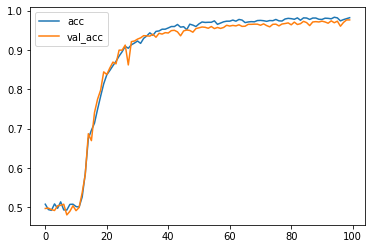

In [41]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

With only 100 iterations, global max pooling produces far superior results.